# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
hr = pd.read_csv('data/clean/hr_analytics.csv')

## 1. Train Test Splits

- list of features

In [3]:
features = [
    'city_development_index', 
    'gender', 
    'relevent_experience', 
    'enrolled_university', 
    'education_level', 
    'major_discipline', 
    'experience', 
    'company_size',
    'company_type',
    'training_hours',
    'gender_missing',
    'major_discipline_missing',
    'company_size_missing',
    'company_type_missing'    
]

X = hr[features]
y = hr['target']

- check distribution of target label

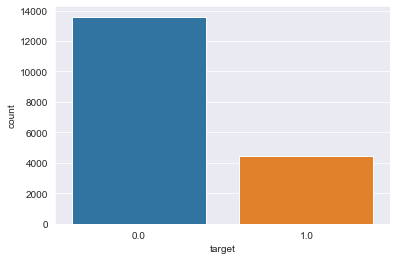

In [4]:
sns.countplot(x=y);

- use stratified split for a imbalanced dataset

In [5]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 2. Hyperparameter Tuning

- specify column subset

In [6]:
numeric_features = [
    'city_development_index', 
    'training_hours'
]

categorical_features = [
    'gender', 
    'relevent_experience', 
    'enrolled_university', 
    'education_level', 
    'major_discipline', 
    'experience', 
    'company_size',
    'company_type',
    'gender_missing',
    'major_discipline_missing',
    'company_size_missing',
    'company_type_missing' 
]

- encoding and scaling pipeline

In [7]:
preprocess_rf = ColumnTransformer(
    transformers=[
        ('targetencode', TargetEncoder(), categorical_features),
        ('standardscaler', StandardScaler(), numeric_features)], 
    n_jobs=-1
)

- classifier pipeline

In [8]:
pipe_rf = Pipeline(
    steps=[
        ('preprocess', preprocess_rf),
        ('rf', RandomForestClassifier(n_jobs=-1, random_state=42, warm_start=True))]
)

- hyperparameter tuning

In [9]:
%%time
params_rf = {
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_depth': [2, 4, 6, 8, 10]
}

gscv_rf = GridSearchCV(
    pipe_rf, 
    params_rf, 
    scoring='roc_auc',
    cv=5, 
    n_jobs=-1).fit(X_dev, y_dev)

Wall time: 21 s


In [10]:
gscv_rf.best_params_

{'rf__max_depth': 8, 'rf__n_estimators': 300}

In [11]:
print(f'train accuracy: {gscv_rf.score(X_dev, y_dev)}')

train accuracy: 0.8497930181212104


## 3. Optimal Model Training

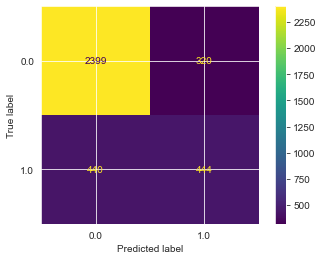

In [12]:
ConfusionMatrixDisplay.from_estimator(gscv_rf.best_estimator_, X_test, y_test);